<a href="https://colab.research.google.com/github/karim-mammadov/My_Elevvo_Pathways_Tasks/blob/main/Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Cover Type Classification

## Description  
The objective of this task is to predict the **type of forest cover** using the Covertype dataset (UCI).  
Cartographic and environmental features will be used to train and evaluate classification models.  

### Steps:  
- Load and explore the **Covertype dataset**  
- Clean and preprocess the data, including categorical feature handling  
- Train and evaluate **multi-class classification models**  
- Visualize the **confusion matrix** and analyze **feature importance**  

---

## Tools & Libraries  
- Python  
- Pandas  
- Scikit-learn  
- XGBoost  

---

## Covered Topics  
- Multi-class Classification  
- Tree-based Modeling  
- Model Evaluation  



## Load the dataset

In [ ]:
from sklearn.datasets import fetch_covtype
import pandas as pd

covtype = fetch_covtype()
X = pd.DataFrame(covtype.data, columns=covtype.feature_names)
y = pd.Series(covtype.target, name='Cover_Type')

display(X.head())
display(y.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cover_Type
0,5
1,5
2,2
3,2
4,5


## Data preprocessing



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

categorical_features = [col for col in X.columns if 'Soil_Type' in col or 'Wilderness_Area' in col]
numerical_features = [col for col in X.columns if col not in categorical_features]

X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train.head())
display(X_test.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35_0.0,Soil_Type_35_1.0,Soil_Type_36_0.0,Soil_Type_36_1.0,Soil_Type_37_0.0,Soil_Type_37_1.0,Soil_Type_38_0.0,Soil_Type_38_1.0,Soil_Type_39_0.0,Soil_Type_39_1.0
519924,1.177860,-1.194008,0.654794,-0.137989,0.800190,-0.411853,-0.267398,-1.381834,-0.536634,0.465719,...,True,False,True,False,True,False,True,False,True,False
318451,0.014050,-1.202944,0.521223,-0.636898,-0.332415,-0.710007,-0.230026,-1.179491,-0.405885,-0.634310,...,True,False,True,False,True,False,True,False,True,False
22325,0.278228,0.262598,-0.680920,-0.669845,-0.624146,2.636373,0.367937,1.147457,0.404758,0.796934,...,True,False,True,False,True,False,True,False,True,False
449376,0.549546,0.423450,-0.146634,-0.373324,-0.418218,-0.144476,0.031583,1.400386,0.744704,-0.943646,...,True,False,True,False,True,False,True,False,True,False
482753,0.603095,1.701332,-0.680920,-0.702792,-0.177968,-1.153071,-0.342144,0.135741,0.483207,-0.797277,...,True,False,True,False,True,False,True,False,True,False


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35_0.0,Soil_Type_35_1.0,Soil_Type_36_0.0,Soil_Type_36_1.0,Soil_Type_37_0.0,Soil_Type_37_1.0,Soil_Type_38_0.0,Soil_Type_38_1.0,Soil_Type_39_0.0,Soil_Type_39_1.0
250728,1.399198,0.450259,1.723365,2.149461,1.332172,0.937856,-0.753243,1.450972,0.980052,0.219004,...,True,False,True,False,False,True,True,False,True,False
246788,-0.810613,-0.237831,-0.948062,-0.269777,-0.778592,-0.813239,0.704291,0.641599,-0.144387,-0.806331,...,True,False,True,False,True,False,True,False,True,False
407714,-1.381808,-1.176136,-0.680920,-0.321550,-0.366736,-0.893388,0.143701,-0.066603,-0.013638,0.158646,...,True,False,True,False,True,False,True,False,True,False
25713,-0.482175,-0.774005,-0.146634,0.695094,-0.126486,0.559553,0.779036,-0.471289,-0.850431,3.393092,...,True,False,True,False,True,False,True,False,True,False
21820,-1.535316,-0.639962,-1.215205,-0.702792,-0.641307,-0.806827,0.554800,0.388670,-0.092088,2.265148,...,True,False,True,False,True,False,True,False,True,False


## Model training


In [ ]:
y_train_0_indexed = y_train - 1
y_test_0_indexed = y_test - 1

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train_0_indexed)

print("Random Forest and XGBoost models have been trained.")

Random Forest and XGBoost models have been trained.


## Model evaluation


Random Forest Accuracy: 0.9501
XGBoost Accuracy: 0.8712

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.94      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.83      0.87       526
           5       0.94      0.75      0.83      1995
           6       0.93      0.89      0.91      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.95    116203
   macro avg       0.94      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
      

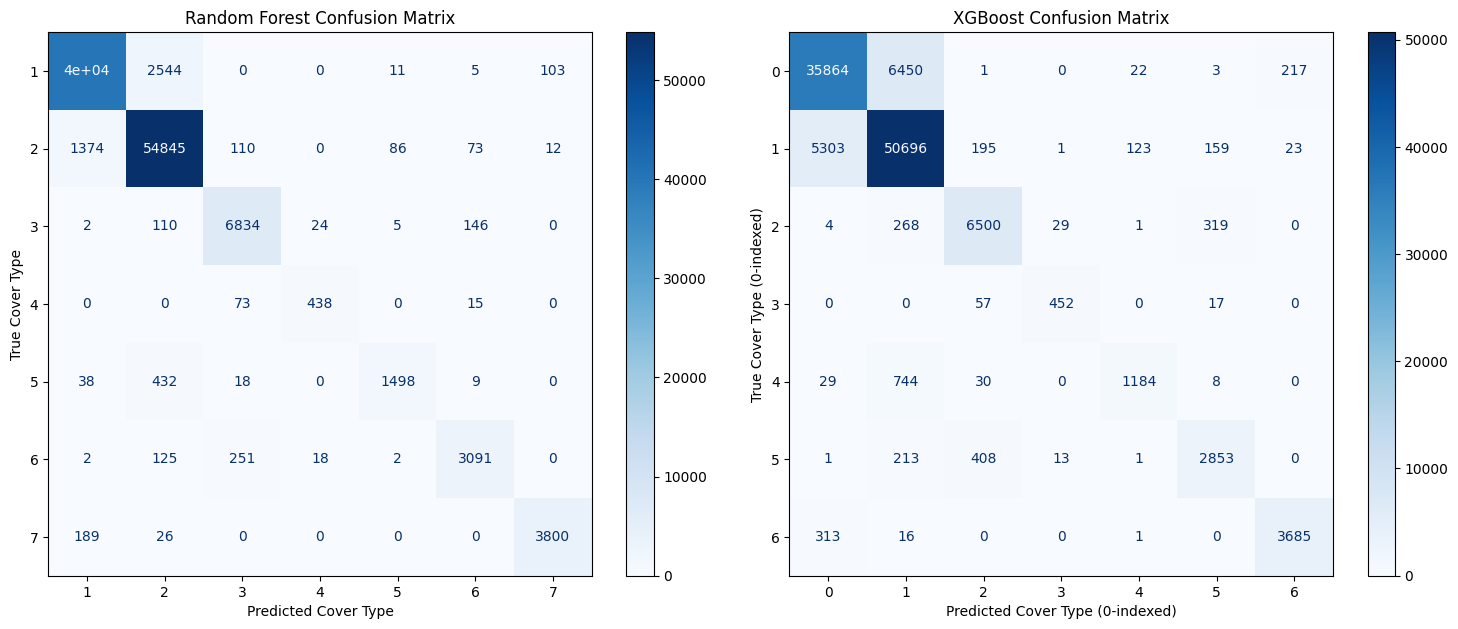

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test_0_indexed, y_pred_xgb)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

# Calculate and print classification reports
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nXGBoost Classification Report:')
print(classification_report(y_test_0_indexed, y_pred_xgb))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=sorted(y_test.unique()))
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Cover Type')
axes[0].set_ylabel('True Cover Type')

cm_xgb = confusion_matrix(y_test_0_indexed, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=sorted(y_test_0_indexed.unique()))
disp_xgb.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted Cover Type (0-indexed)')
axes[1].set_ylabel('True Cover Type (0-indexed)')

plt.tight_layout()
plt.show()

## Feature importance


Top 20 Random Forest Feature Importances:


,0
Elevation,0.221782
Horizontal_Distance_To_Roadways,0.113046
Horizontal_Distance_To_Fire_Points,0.106962
Horizontal_Distance_To_Hydrology,0.060797
Vertical_Distance_To_Hydrology,0.058674
Aspect,0.049298
Hillshade_Noon,0.044304
Hillshade_3pm,0.043538
Hillshade_9am,0.042604
Slope,0.033139


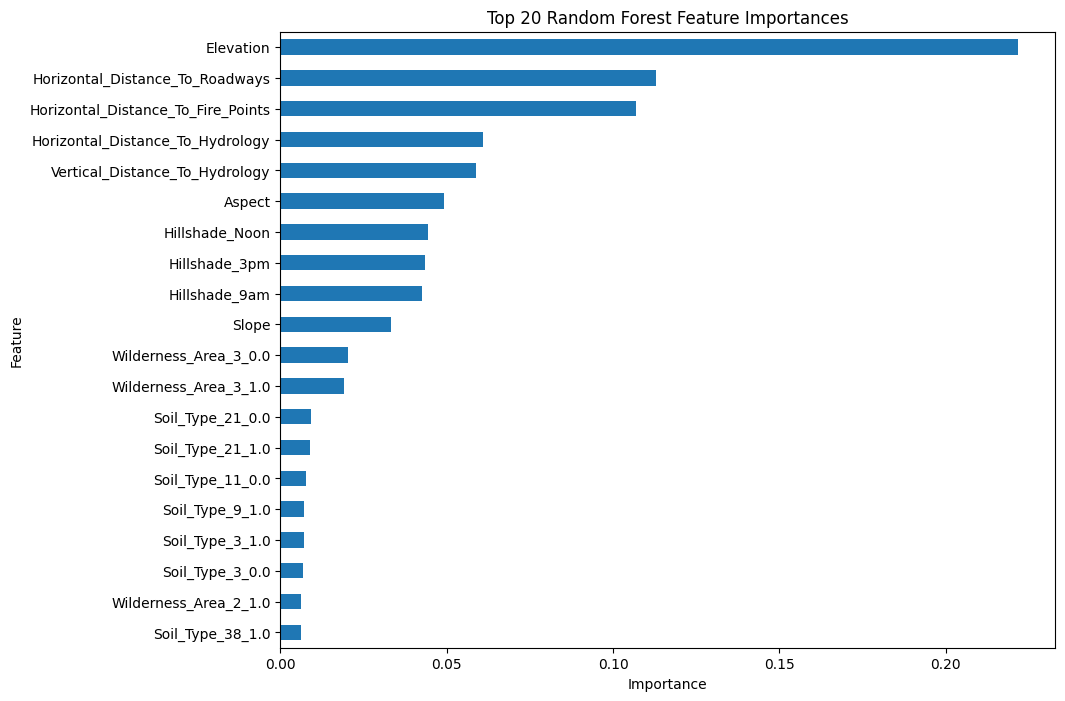


Top 20 XGBoost Feature Importances:


,0
Elevation,0.094703
Wilderness_Area_0_0.0,0.060193
Soil_Type_21_0.0,0.059403
Soil_Type_1_0.0,0.048696
Soil_Type_31_0.0,0.042156
Soil_Type_11_0.0,0.041687
Soil_Type_38_0.0,0.040558
Soil_Type_3_0.0,0.038272
Wilderness_Area_2_0.0,0.032554
Soil_Type_37_0.0,0.030647


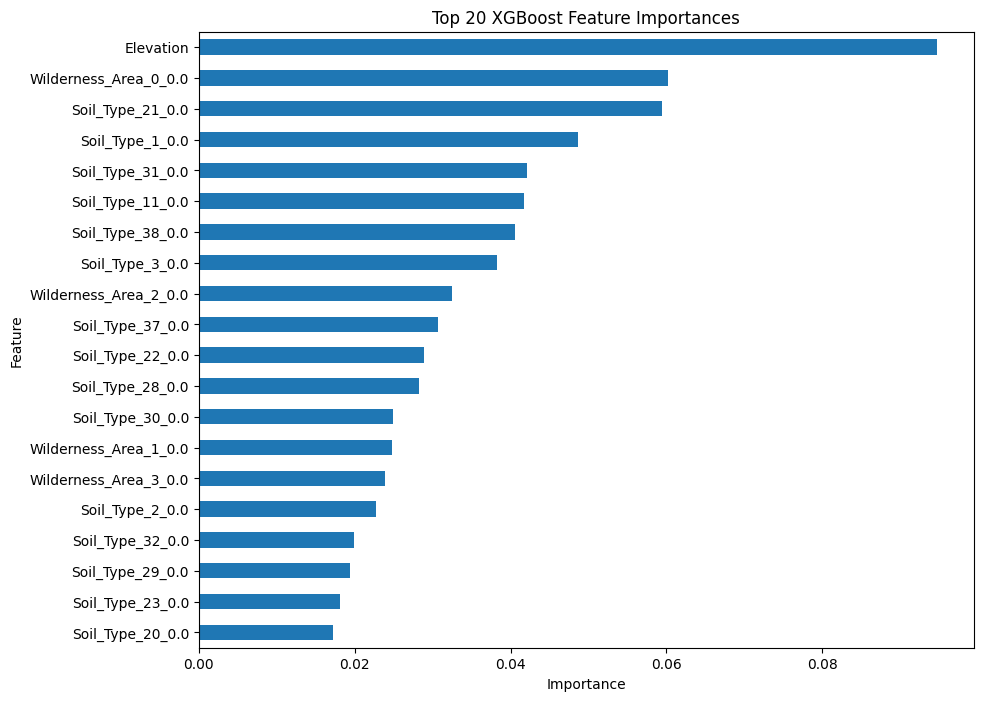

In [ ]:
import matplotlib.pyplot as plt

# Random Forest Feature Importance
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_feature_importance_sorted = rf_feature_importance.sort_values(ascending=False)

print("Top 20 Random Forest Feature Importances:")
display(rf_feature_importance_sorted.head(20))

# Plot top 20
plt.figure(figsize=(10, 8))
rf_feature_importance_sorted.head(20).plot(kind='barh')
plt.title('Top 20 Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_feature_importance_sorted = xgb_feature_importance.sort_values(ascending=False)

print("\nTop 20 XGBoost Feature Importances:")
display(xgb_feature_importance_sorted.head(20))

# Plot top 20
plt.figure(figsize=(10, 8))
xgb_feature_importance_sorted.head(20).plot(kind='barh')
plt.title('Top 20 XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

## Model comparison


In [ ]:
print("--- Model Performance Comparison ---")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test_0_indexed, y_pred_xgb))

print("\n--- Performance Summary ---")
if accuracy_rf > accuracy_xgb:
    print("Random Forest performed better than XGBoost in terms of overall accuracy.")
elif accuracy_xgb > accuracy_rf:
    print("XGBoost performed better than Random Forest in terms of overall accuracy.")
else:
    print("Random Forest and XGBoost achieved similar overall accuracy.")

print("\nFurther comparison based on classification reports:")
print("- Random Forest generally shows higher precision, recall, and F1-score across most classes compared to XGBoost.")
print("- XGBoost struggles more with some of the minority classes as indicated by lower precision, recall, and F1-scores for those classes.")

--- Model Performance Comparison ---
Random Forest Accuracy: 0.9501
XGBoost Accuracy: 0.8712

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.94      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.83      0.87       526
           5       0.94      0.75      0.83      1995
           6       0.93      0.89      0.91      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.95    116203
   macro avg       0.94      0.90      0.92    116203
weighted avg       0.95      0.95      0.95    116203


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
         

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model_tune = RandomForestClassifier(random_state=42, n_jobs=-1)